**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
---
# <a id='toc1_'></a>[資料探勘實驗 2 - 階段 1](#toc0_)
在這個實驗的第一階段，我們將專注於神經詞嵌入 (Neural Word Embeddings) 的使用。

## <a id='toc1_1_'></a>[內容摘要目錄](#toc0_)
- **階段 1：**
1. 資料準備
2. 特徵工程
3. 模型
4. 結果評估
5. 其他您可以嘗試的事項
6. 深度學習
7. 詞向量 (Word to Vector)
8. 分群 (Clustering)
9. 高維度視覺化
    

## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)


**任務：** 使用詞嵌入和其他深度資訊檢索方法，將文字資料分類為 4 種不同的情緒。



---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

我們首先將 csv 檔案載入到一個用於訓練的 pandas dataframe 和一個用於測試的 dataframe 中。

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)


Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

繪製訓練和測試資料集中前 30 個詞的詞頻圖。(提示：參考資料探勘實驗 1)

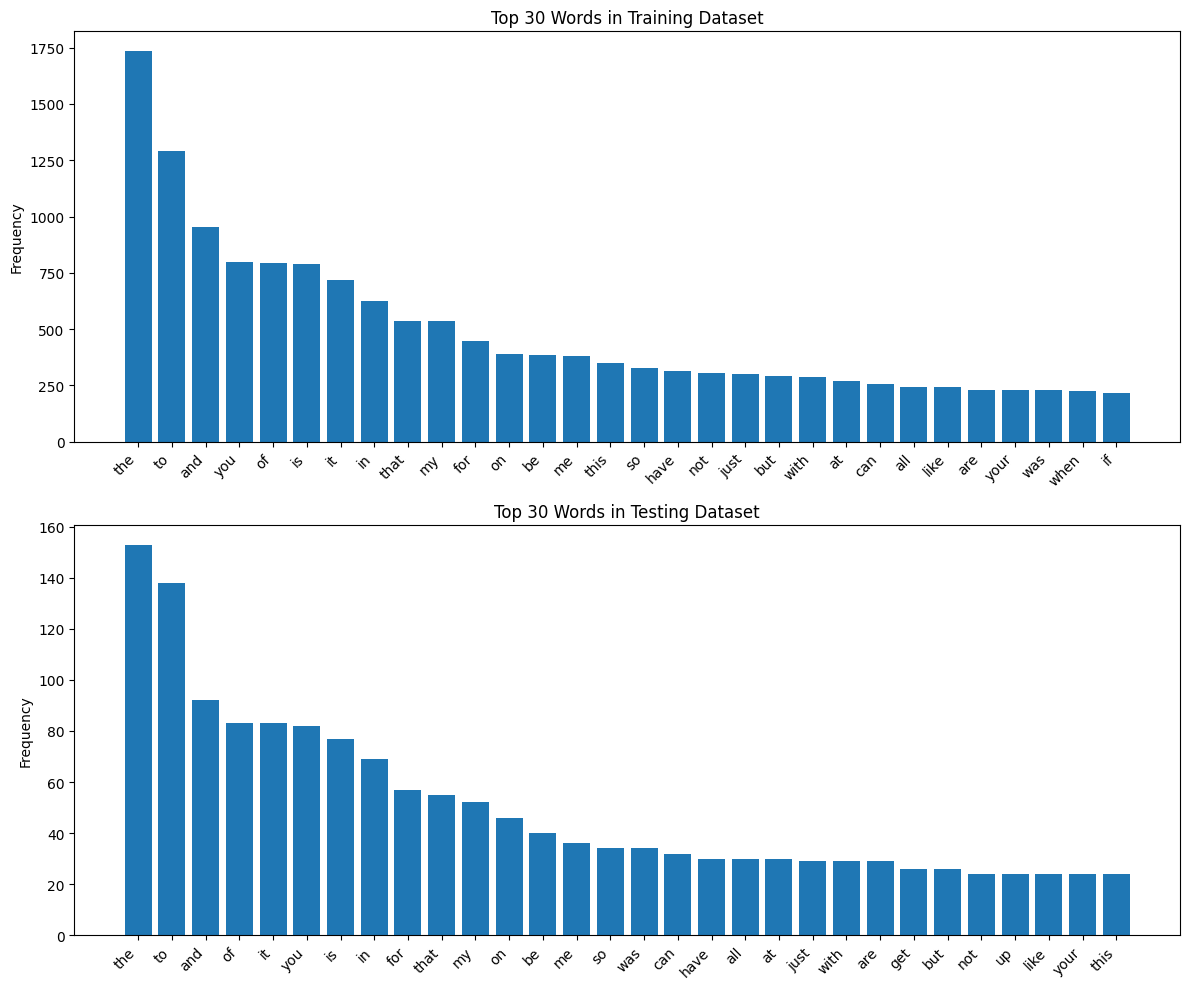

In [6]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

%matplotlib inline

# 建立 CountVectorizer 計算訓練資料詞頻
bow_train = CountVectorizer(max_features=None)
train_features = bow_train.fit_transform(train_df['text'])
train_words = bow_train.get_feature_names_out()

# 計算訓練資料詞頻
train_word_count = train_features.toarray().sum(axis=0)
train_word_freq = pd.DataFrame({
    'word': train_words,
    'frequency': train_word_count
}).sort_values('frequency', ascending=False).head(30)

# 建立 CountVectorizer 計算測試資料詞頻
bow_test = CountVectorizer(max_features=None)
test_features = bow_test.fit_transform(test_df['text'])
test_words = bow_test.get_feature_names_out()

# 計算測試資料詞頻
test_word_count = test_features.toarray().sum(axis=0)
test_word_freq = pd.DataFrame({
    'word': test_words,
    'frequency': test_word_count
}).sort_values('frequency', ascending=False).head(30)

# 繪製訓練資料詞頻圖
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 訓練資料 (縱向長條圖)
ax1.bar(range(len(train_word_freq)), train_word_freq['frequency'].values)
ax1.set_xticks(range(len(train_word_freq)))
ax1.set_xticklabels(train_word_freq['word'].values, rotation=45, ha='right')
ax1.set_ylabel('Frequency')
ax1.set_title('Top 30 Words in Training Dataset')

# 測試資料 (縱向長條圖)
ax2.bar(range(len(test_word_freq)), test_word_freq['frequency'].values)
ax2.set_xticks(range(len(test_word_freq)))
ax2.set_xticklabels(test_word_freq['word'].values, rotation=45, ha='right')
ax2.set_ylabel('Frequency')
ax2.set_title('Top 30 Words in Testing Dataset')

plt.tight_layout()
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

我們將以 Pickle 格式儲存資料。 pickle 模組實作了用於序列化和反序列化 Python 物件結構的二進位協定。

使用 pickle 結構的一些優勢：
* 由於它儲存了屬性類型，因此更便於跨平台使用。
* 當資料量龐大時，它可以佔用更少的儲存空間，並減少載入時間。

In [7]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [8]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

---
### <a id='toc1_5_3_'></a>[**1.3 探索性資料分析 (EDA)**](#toc0_)

再次強調，在開始之前，我們需要先進行一些探索，以了解我們正在處理的數據。

In [9]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

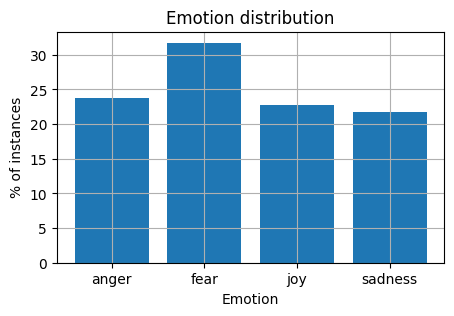

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

## <a id='toc1_6_'></a>[**2. 特徵工程**](#toc0_)
### <a id='toc1_6_1_'></a>[使用詞袋模型](#toc0_)
使用 scikit-learn 的 ```CountVectorizer`` 計算詞頻，並將其作為特徵來訓練模型。
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
# 建構分析器（詞袋模型）
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
# 1. 學習原始文件中所有標記的詞彙字典。
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
# 2. 將文檔轉換為文檔術語矩陣。
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [16]:
# add .toarray() to show
# 新增 .toarray() 來顯示
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

嵌入已完成。理論上，我們可以將其輸入到模型中。但是，根據您使用的嵌入技術和模型，您的準確率可能會下降，原因如下：

* 維數災難（我們現在有 10,115 個維度）
* 一些重要特徵被忽略（例如，一些使用表情符號的模型比其他模型表現更好）

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.
讓我們嘗試使用下面的另一個標記器。

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

d:\研究所必看\研究所課程\114-1\資料探勘與應用\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       ...,
       [0, 8, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> 練習 2（帶回家）：**](#toc0_)
使用 TF-IDF 向量化器（而不是 BOW 向量化器）產生具有 1000 個特​​徵的嵌入，並顯示特徵 [100:110] 的特徵名稱。

In [24]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzer using TF-IDF vectorizer
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
print('Dimension of TF-IDF features:', train_data_TFIDF_features_1000.shape)

## observe feature names [100:110]
feature_names_TFIDF_1000 = TFIDF_1000.get_feature_names_out()
print('\nFeature names [100:110]:')
print(feature_names_TFIDF_1000[100:110])

Dimension of TF-IDF features: (3613, 1000)

Feature names [100:110]:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

使用 scikit-learn 的“DecisionTreeClassifier”計算詞頻，並將其作為特徵來訓練模型。
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'anger', 'sadness', 'fear', 'sadness', 'fear',
       'fear', 'joy', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

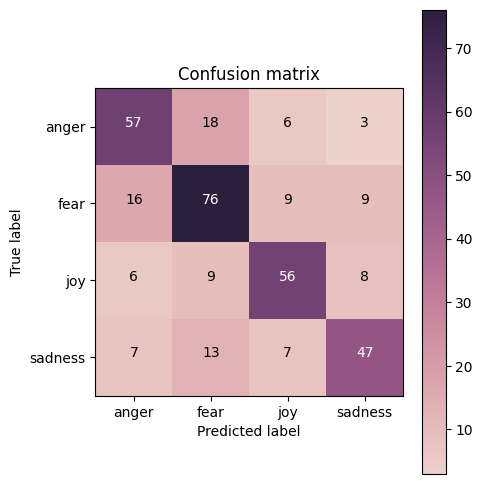

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

##### <a id='toc1_8_1_1_1_'></a>[**>>> 練習 3（帶回家）：**](#toc0_)
你能解釋上面的結果嗎？它們意味著什麼？

# Answer here
joy 的分類效能最好，sadness 的分類效能最差，anger 被誤認為fear有16，fear被誤為anger有18，這兩互相容易弄錯， 這兩種情緒在文本特徵上較難區分。

joy has the best classification efficiency, and sadness has the worst classification efficiency. Anger was mistaken for fear 16 times, and fear was mistaken for anger 18 times. The two emotions are easily confused with each other, and it is difficult to distinguish these two emotions based on text features.

##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> 練習 4（帶回家）：**](#toc0_)
使用“樸素貝葉斯”模型建立模型並進行訓練。測試結果如何？

*參考*：https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

前10筆測試預測結果:
['anger' 'anger' 'anger' 'sadness' 'sadness' 'anger' 'sadness' 'anger'
 'joy' 'anger']

樸素貝葉斯模型效能:
訓練準確率: 0.7919
測試準確率: 0.6974

分類報告:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


混淆矩陣:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


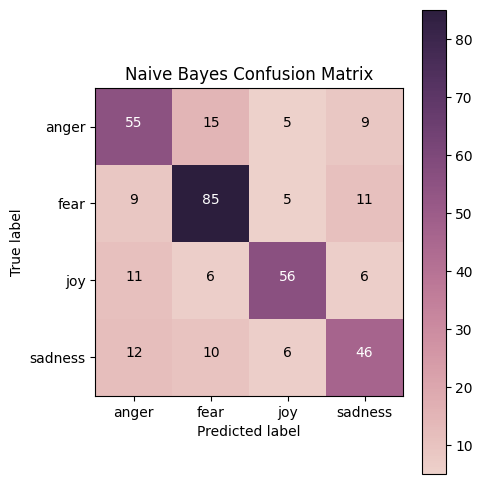

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 建立樸素貝葉斯模型
NB_model = MultinomialNB()

# 訓練模型
NB_model.fit(X_train, y_train)

# 進行預測
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

# 檢查預測結果
print("前10筆測試預測結果:")
print(y_test_pred_NB[:10])

# 計算準確率
acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('\n樸素貝葉斯模型效能:')
print('訓練準確率: {}'.format(round(acc_train_NB, 4)))
print('測試準確率: {}'.format(round(acc_test_NB, 4)))

# 詳細分類報告
print('\n分類報告:')
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

# 混淆矩陣
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB)
print('\n混淆矩陣:')
print(cm_NB)

# 繪製混淆矩陣
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_NB, classes=my_tags, title='Naive Bayes Confusion Matrix')

### 我的觀察
anger有部分被預測成 fear 或 sadness，表示模型在負向情緒間的邊界仍不夠清楚，fear矩陣對角線有 85，為四類中最好，​joy常被誤判為 anger 或 sadness 的比例較低，整體屬良好，。sadness易與 anger、fear 混淆，顯示在語意或詞彙層面上和其他負向情緒重疊。

### My Observations
Some "anger" was predicted as "fear" or "sadness," indicating that the model still lacks a clear understanding of the boundaries between negative emotions. The diagonal of the "fear" matrix has a score of 85, the best among the four categories. "Joy" was misclassified as "anger" or "sadness" at a relatively low rate, indicating good overall performance. Sadness is easily confused with "anger" and "fear," indicating semantic or lexical overlap with other negative emotions. This is not a significant improvement over the previous decision tree model.

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> 練習 5（帶回家）：**](#toc0_)

樸素貝葉斯模型和決策樹模型的結果有何不同？你如何解釋這些差異？請運用課堂上講解的理論背景知識，試著解釋這些差異。

# Answer here
兩個模型都有過擬合的問題，訓練資料準確率高，但驗證資料準確率低，比較兩個準確率上，樸素貝葉斯略高決策樹，上課說單看準確率容易忽略類別不平衡與錯誤型態，因此要再看F1，
F1上的表現也差不多，因此我感覺這兩個模型在都有相似的效能。

Both models suffer from overfitting. Their accuracy is high on the training data, but low on the validation data. Comparing the two models, Naive Bayes has a slightly higher accuracy than the decision tree. In class, we learned that simply looking at accuracy can easily overlook class imbalance and erroneous patterns, so we should also consider F1.
The F1 performance is similar, so I feel the two models have similar performance.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

因此，您可以嘗試一些會影響結果的方法。為了獲得更好的結果，您可以嘗試以下方法：
- 嘗試不同的特徵（特徵工程），例如 Word2Vec、PCA、LDA、FastText、聚類
- 嘗試不同的模型
- 分析結果並進行解讀，以改善特徵工程/模型建構流程
- 重複上述步驟，直到找到滿意的結果

請記住，您還應該考慮當前的任務以及要將資料輸入的模型。

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

---
## <a id='toc1_10_'></a>[**6. 深度學習**](#toc0_)

我們使用 [Keras](https://keras.io/) 作為深度學習框架，並遵循 [模型（函數式 API）](https://keras.io/models/model/) 建立深度神經網路 (DNN) 模型。 Keras 的後端使用 TensorFlow 運作。這是一個很好的抽象概念，可以幫助你開始使用神經網路模型。

由於深度學習課程為期一學期，我們無法在實驗環節詳細講解。這裡，我們僅提供一個簡單的模板，教你如何成功建立和運行深度學習模型。你可以按照這個模板來設計你的模型。

我們將從建立一個全連接網路開始，它如下所示：

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [33]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [34]:
import keras

In [35]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

### <a id='toc1_10_2_'></a>[**6.2 處理分類標籤 (y)**](#toc0_)

與其將標籤 `train_df['emotion']` 直接放入模型中，不如自己處理這些分類（或稱名義）標籤。

在這裡，我們使用基本方法 [獨熱編碼](https://en.wikipedia.org/wiki/One-hot) 將分類標籤轉換為數值標籤。

In [36]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1811       fear
2811        joy
3066    sadness
449       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [37]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [38]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [39]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [40]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3692 - loss: 1.3273 - val_accuracy: 0.4179 - val_loss: 1.2850
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 0.9895 - val_accuracy: 0.6484 - val_loss: 0.9309
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.5798 - val_accuracy: 0.7061 - val_loss: 0.7793
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4150 - val_accuracy: 0.6744 - val_loss: 0.8072
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8843 - loss: 0.3202 - val_accuracy: 0.7003 - val_loss: 0.8377
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.2608 - val_accuracy: 0.6772 - val_loss: 0.9205
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9311 - loss: 0.2137 - val_accuracy: 0.6772 - val_loss: 0.9576
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9435 - loss: 0.1802 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [41]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[9.4960755e-01, 4.9313966e-02, 1.0332805e-09, 1.0784382e-03],
       [9.9879128e-01, 6.2669943e-07, 9.4302159e-08, 1.2080517e-03],
       [9.4417757e-01, 2.7727247e-03, 1.7502652e-02, 3.5547055e-02],
       [6.4984948e-04, 8.4113854e-04, 8.0955142e-01, 1.8895763e-01],
       [7.1646792e-01, 2.6632817e-02, 1.3187648e-02, 2.4371153e-01]],
      dtype=float32)

In [42]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'anger', 'joy', 'anger'], dtype=object)

In [43]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [44]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369222,1.327254,0.417867,1.284968
1,1,0.634653,0.989458,0.648415,0.930886
2,2,0.791863,0.579784,0.706052,0.779321
3,3,0.851093,0.415046,0.674352,0.807228
4,4,0.884307,0.320188,0.700288,0.837652
5,5,0.910877,0.260756,0.677233,0.920475
6,6,0.931082,0.213733,0.677233,0.957556
7,7,0.943537,0.180155,0.688761,1.004914
8,8,0.958206,0.150119,0.677233,1.106449
9,9,0.962358,0.129182,0.688761,1.167440


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)

繪製訓練集和驗證集的準確率和損失（不同的圖），如下圖所示。 （注意：下圖是另一個模型的範例）。如何解讀你繪製的圖表？它們與課堂上講解的過度擬合/欠擬合概念有何關聯？

# Answer here
明顯訓練集的準確率高於測試集，代表模型有過度擬合的現象。


Obviously, the accuracy of the training set is higher than that of the test set, which means that the model is overfitting.

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

### <a id='toc1_10_6_'></a>[注意](#toc0_)

如果您沒有 GPU（GTX 1060 以上）或不擅長設定電腦的許多參數，我們建議您使用 [kaggle kernel](https://www.kaggle.com/kernels) 進行深度學習模型訓練。他們已經安裝了所有庫，並提供免費 GPU 供您使用。

但請注意，您只能運行一個 kernel 6 小時。 6 小時不活動後，您的 Kaggle kernel 將關閉（這意味著如果您的模型訓練時間超過 6 小時，您將無法立即進行訓練）。

### <a id='toc1_10_7_'></a>[更多資訊供您參考](#toc0_)

* Keras 文件：https://keras.io/
* Keras GitHub 範例：https://github.com/keras-team/keras/tree/master/examples
* CS229：機器學習：http://cs229.stanford.edu/syllabus.html
* 深度學習速查表：https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* 如果您想嘗試 TensorFlow 或 PyTorch：https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [45]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1811,20954,@corruptmelon now im feeling the,"[@, corruptmelon, now, im, feeling, the]"
2811,30807,Your glee filled Normy dry humping of the most...,"[Your, glee, filled, Normy, dry, humping, of, ..."
3066,40239,Theyve substituted the hood for a badge and gu...,"[Theyve, substituted, the, hood, for, a, badge..."
449,10449,Hey folks sorry if anything offensive got post...,"[Hey, folks, sorry, if, anything, offensive, g..."
1971,21114,It's so funny cause Cooper's going to go farth...,"[It, 's, so, funny, cause, Cooper, 's, going, ..."


In [46]:
## create the training corpus
## 建立訓練語料庫
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'corruptmelon', 'now', 'im', 'feeling', 'the']),
       list(['Your', 'glee', 'filled', 'Normy', 'dry', 'humping', 'of', 'the', 'most', 'recent', 'high', 'profile', 'celebrity', 'break', 'up', 'is', 'pathetic', '&', 'amp', ';', 'all', 'that', 'is', 'wrong', 'with', 'the', 'world', 'today', '.']),
       list(['Theyve', 'substituted', 'the', 'hood', 'for', 'a', 'badge', 'and', 'gun', '.', "'", 'Public', 'opinion', 'is', 'indictment', 'of', 'Charlotte', 'police', '.', '#', 'dark', '#', 'sadtimes', '#', 'america', '#', 'race'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [47]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [48]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.7210772 ,  0.02175145, -0.14942311,  0.10801352, -0.20961046,
       -1.0655167 ,  0.39523745,  1.6612407 , -1.0073026 , -0.3839747 ,
       -0.65419006, -0.4600714 , -0.6549899 ,  0.33912608, -0.06270373,
       -0.25070313,  0.2193451 , -0.8451812 ,  0.19942246, -1.3273572 ,
        0.63725096,  0.7121158 ,  0.9087096 ,  0.03701315,  0.17366348,
       -0.19694027, -0.5950703 ,  0.49821055, -0.4438967 , -0.0550108 ,
        0.330125  , -0.2896832 ,  0.5352033 , -0.47239792, -0.33546162,
        0.29298145,  0.06316084, -0.84151524, -0.75548285, -0.61141163,
        0.16776614,  0.43036383, -0.19601478,  0.37953103,  0.9126994 ,
       -0.285532  , -0.5155891 ,  0.06656714,  0.5932421 ,  0.44113743,
       -0.19089629, -0.25933352, -0.16302583, -0.38177454, -0.25921294,
       -0.44961414, -0.03173346, -0.06493918, -0.3217686 , -0.07019421,
       -0.09908531,  0.0642214 ,  0.5555045 ,  0.01671061, -0.30539256,
        0.5514684 ,  0.5241448 ,  0.4267694 , -1.2920038 ,  0.42

In [49]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9455596804618835),
 ('bday', 0.9215953946113586),
 ('birthday', 0.9146074056625366),
 ('free', 0.9142598509788513),
 ('Be', 0.9089245200157166),
 ('ukedchat', 0.9004639387130737),
 ('nuclear', 0.8984766006469727),
 ('Kik', 0.8910436630249023),
 ('cats', 0.8888332843780518),
 ('smile', 0.8868309259414673)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

---
### <a id='toc1_11_4_'></a>[**7.4 使用預先訓練的 w2v 模型**](#toc0_)

除了訓練自己的模型外，您還可以使用已經訓練好的模型。這裡我們介紹兩種方法：

#### <a id='toc1_11_4_1_'></a>[(1) 自行下載模型](#toc0_)

從此連結下載：[Kaggle | Google News 向量](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

將資料“GoogleNews-vectors-negative300.bin”複製到以下資料夾目錄：“GoogleNews/”

資料來源：[GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

更多詳情：https://radimrehurek.com/gensim/models/keyedvectors.html

In [50]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
# 重要提示：請確保您已正確下載檔案並將其放入正確的目錄中
## 注意：此模型很大，這將需要一些時間…
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [51]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

讓我們運行 Word2Vec 最著名的例子之一，並計算這 3 個單字之間的相似度：

In [52]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191123008728),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902430415153503),
 ('crown_prince', 0.5499458909034729),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

##### <a id='toc1_11_5_1_1_'></a>[**>>> 練習 7（帶回家）：**](#toc0_)

現在，我們有了單字向量，但我們的輸入資料是一串單字（或說句子）。
我們如何利用這些「字」向量來表示句子資料並訓練我們的模型？

# Answer here
要把多個「字」向量變成一個能代表「整句話」的向量，可以使用「平均詞向量」(Average Word Vectors)的方法。具體步驟如下：
1. 對句子中的每個單詞，使用預訓練的詞向量模型（如Word2Vec、GloVe等）獲取其對應的詞向量。
2. 將句子中所有單詞的詞向量相加起來，得到一個總和向量。
3. 將總和向量除以句子中單詞的數量，得到平均詞向量，這個向量即代表整句話的語義。
4. 如果句子中有些單詞不在詞向量模型的詞彙表中，可以選擇忽略這些單詞，或者使用一個預設的向量（如零向量）來代替它們。 

To convert multiple word vectors into a single vector that represents the entire sentence, you can use the "Average Word Vectors" method. The specific steps are as follows:
1. For each word in the sentence, use a pre-trained word vector model (such as Word2Vec or GloVe) to obtain its corresponding word vector.
2. Add up the word vectors for all words in the sentence to obtain a summed vector.
3. Divide the summed vector by the number of words in the sentence to obtain the average word vector, which represents the semantic meaning of the entire sentence.
4. If some words in the sentence are not in the vocabulary of the word vector model, you can choose to ignore them or replace them with a preset vector (such as a zero vector).

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


---
## <a id='toc1_12_'></a>[**8. 聚類：k-means**](#toc0_)

這裡我們介紹如何使用 `sklearn` 進行基本的**無監督學習**方法：k-means。

更多詳情：http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [53]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [54]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 3

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 2
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [55]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [56]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

---
## <a id='toc1_13_'></a>[**9. 高維度視覺化：t-SNE 和 UMAP**](#toc0_)

無論使用詞袋模型、TF-IDF 或 Word2Vec，嵌入結果都很難直觀顯示，因為維度大於 3。

在實驗 1 中，我們已經討論了 PCA、t-SNE 和 UMAP。我們可以使用 PCA 來降低資料的維度，然後進行視覺化。然而，如果深入研究結果，就會發現這種方法的缺點。

我們的目標是使用 t-SNE 創建類似於下圖的視覺化效果：

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [57]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

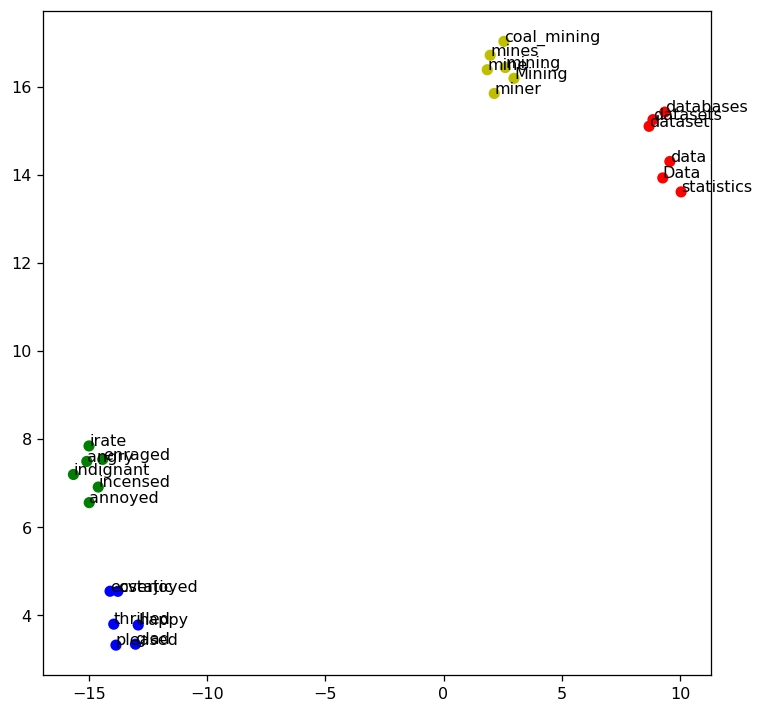

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

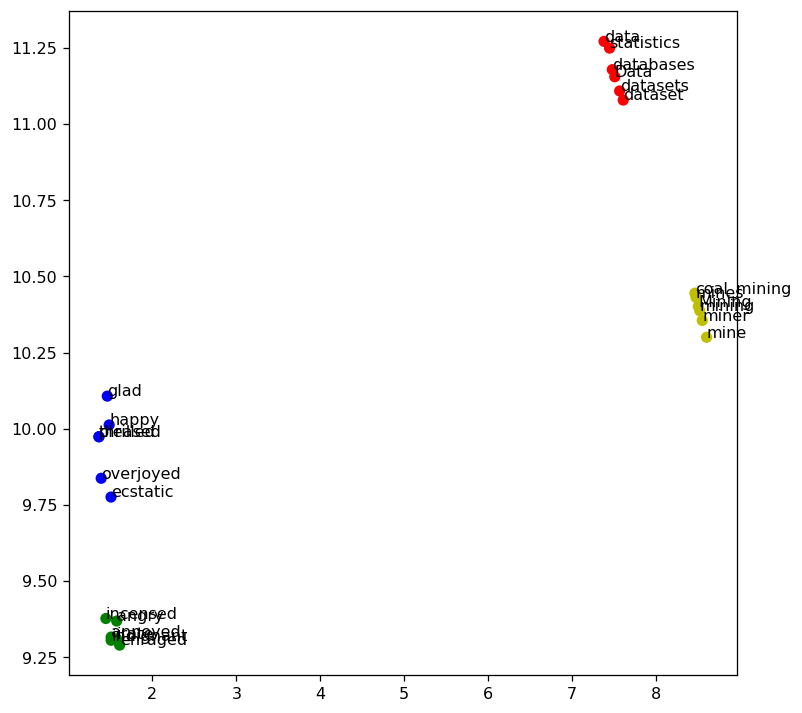

In [59]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

---
##### <a id='toc1_13_2_1_1_'></a>[**>>> 練習 8（帶回家）：**](#toc0_)

產生 t-SNE 和 UMAP 視覺化圖表，顯示與「憤怒」、「高興」、「悲傷」、「恐懼」這幾個字最相關的 15 個字（共 60 個字）。比較兩張圖之間的差異。

In [60]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

TSNE

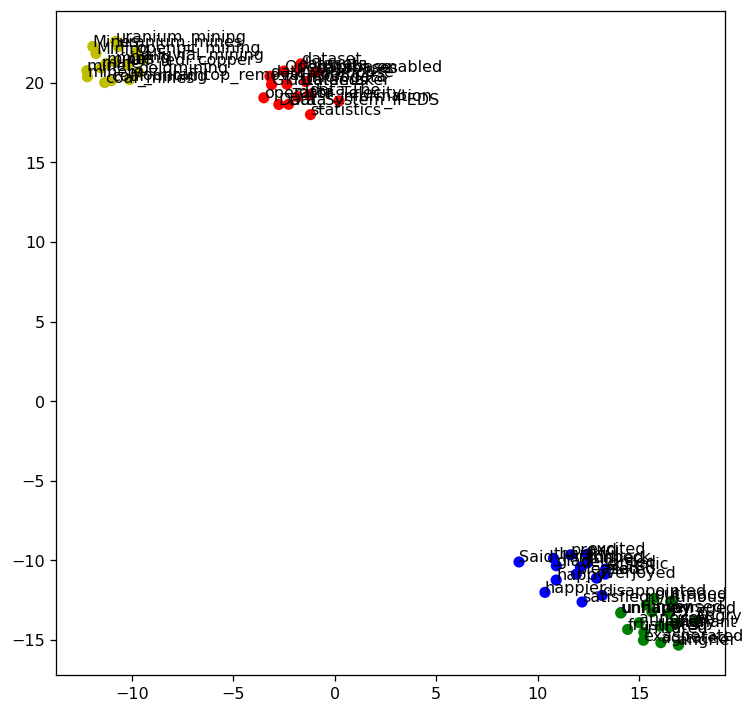

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

 umap


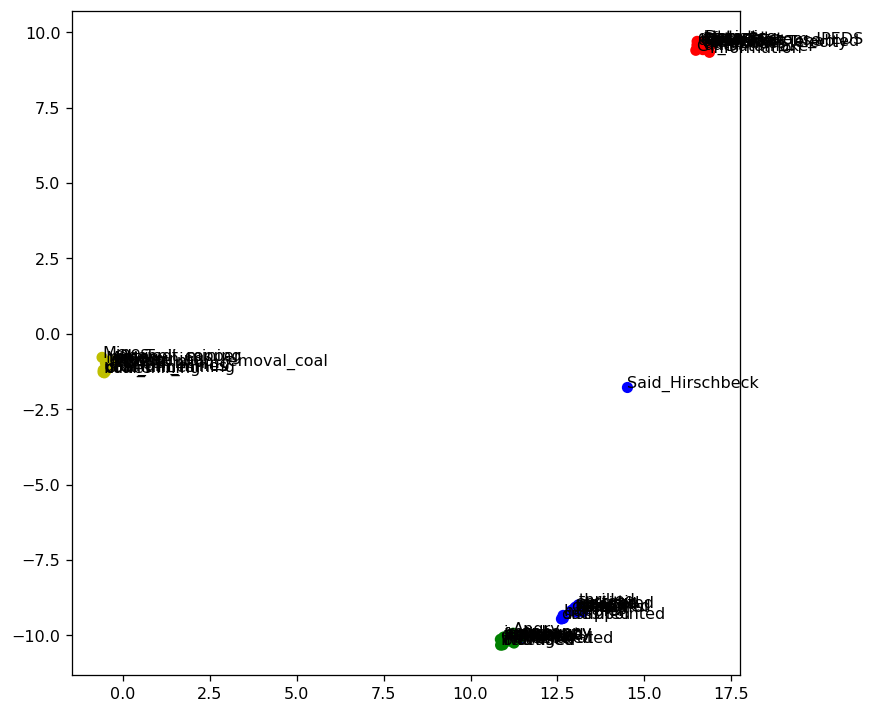

In [62]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Answer here

t‑SNE會把相關詞擠成緊密小圈並拉開群與群的空隙，適合檢查四大情緒各自的15個詞有沒有被詞向量好好聚在一起；UMAP則會把每個詞句到成一個點，整體距離拉遠一點，一眼就能比較每個情緒圈的差異。

t-SNE squeezes related words into tight circles and increases the spacing between clusters, making it suitable for checking whether the 15 words representing each of the four major emotions are well clustered together. UMAP, on the other hand, clusters each word into a single point, increasing overall distances, allowing for a quick comparison of the differences between emotion circles.

---